# Project Topic: Understanding factors that affects employee attrition


# Setting the environment by Importing libraries needed

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the dataset

In [62]:
df = pd.read_csv("employeeAttrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [63]:
df['Education']=df['Education'].replace([1],'Below college')
df['Education']=df['Education'].replace([2],'College')
df['Education']=df['Education'].replace([3],'Bachelor')
df['Education']=df['Education'].replace([4],'Masters')
df['Education']=df['Education'].replace([5],'Doctor')

df['JobSatisfaction']=df['JobSatisfaction'].replace([1],'Low')
df['JobSatisfaction']=df['JobSatisfaction'].replace([2],'Medium')
df['JobSatisfaction']=df['JobSatisfaction'].replace([3],'High')
df['JobSatisfaction']=df['JobSatisfaction'].replace([4],'Very High')

df['JobInvolvement']=df['JobInvolvement'].replace([1],'Low')
df['JobInvolvement']=df['JobInvolvement'].replace([2],'Medium')
df['JobInvolvement']=df['JobInvolvement'].replace([3],'High')
df['JobInvolvement']=df['JobInvolvement'].replace([4],'Very High')

df['PerformanceRating']=df['PerformanceRating'].replace([1],'Low')
df['PerformanceRating']=df['PerformanceRating'].replace([2],'Good')
df['PerformanceRating']=df['PerformanceRating'].replace([3],'Excellent')
df['PerformanceRating']=df['PerformanceRating'].replace([4],'Outstanding')

In [64]:
#dropping the columns that are not needed
new_df = df.drop([ 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'Over18', 'StandardHours','RelationshipSatisfaction','WorkLifeBalance', 'StockOptionLevel', 'YearsInCurrentRole','DailyRate', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1)
new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany
0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,2,Female,High,...,Single,5993,19479,8,Yes,11,Excellent,8,0,6
1,49,No,Travel_Frequently,Research & Development,8,Below college,Life Sciences,3,Male,Medium,...,Married,5130,24907,1,No,23,Outstanding,10,3,10
2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,4,Male,Medium,...,Single,2090,2396,6,Yes,15,Excellent,7,3,0
3,33,No,Travel_Frequently,Research & Development,3,Masters,Life Sciences,4,Female,High,...,Married,2909,23159,1,Yes,11,Excellent,8,3,8
4,27,No,Travel_Rarely,Research & Development,2,Below college,Medical,1,Male,High,...,Married,3468,16632,9,No,12,Excellent,6,3,2


In [65]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
Age                        1470 non-null int64
Attrition                  1470 non-null object
BusinessTravel             1470 non-null object
Department                 1470 non-null object
DistanceFromHome           1470 non-null int64
Education                  1470 non-null object
EducationField             1470 non-null object
EnvironmentSatisfaction    1470 non-null int64
Gender                     1470 non-null object
JobInvolvement             1470 non-null object
JobLevel                   1470 non-null int64
JobRole                    1470 non-null object
JobSatisfaction            1470 non-null object
MaritalStatus              1470 non-null object
MonthlyIncome              1470 non-null int64
MonthlyRate                1470 non-null int64
NumCompaniesWorked         1470 non-null int64
OverTime                   1470 non-null object
PercentSalaryHike          1470 non-

In [66]:
new_df.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.721769,2.063946,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163
std,9.135373,8.106864,1.093082,1.106940,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525
min,18.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,2.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,3.000000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000
max,60.000000,29.000000,4.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000


In [67]:
# Adding new column 'AgeRange'
age_ranges = ["{0} - {1}".format(age, age + 10) for age in range(10, 60, 10)]
age_ranges
count_unique_age_ranges = len(age_ranges)
count_unique_age_ranges
new_df['AgeRange'] = pd.cut(x=new_df['Age'], bins=count_unique_age_ranges, labels=age_ranges)
new_df.head(6)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,AgeRange
0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,2,Female,High,...,5993,19479,8,Yes,11,Excellent,8,0,6,30 - 40
1,49,No,Travel_Frequently,Research & Development,8,Below college,Life Sciences,3,Male,Medium,...,5130,24907,1,No,23,Outstanding,10,3,10,40 - 50
2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,4,Male,Medium,...,2090,2396,6,Yes,15,Excellent,7,3,0,30 - 40
3,33,No,Travel_Frequently,Research & Development,3,Masters,Life Sciences,4,Female,High,...,2909,23159,1,Yes,11,Excellent,8,3,8,20 - 30
4,27,No,Travel_Rarely,Research & Development,2,Below college,Medical,1,Male,High,...,3468,16632,9,No,12,Excellent,6,3,2,20 - 30
5,32,No,Travel_Frequently,Research & Development,2,College,Life Sciences,4,Male,High,...,3068,11864,0,No,13,Excellent,8,2,7,20 - 30


In [68]:
#group by AgeRange
group_df= new_df.groupby(['Attrition']).count()
group_df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,AgeRange
Attrition,,,,,,,,,,,,,,,,,,,,,
No,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,...,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
Yes,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237


In [69]:
new_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [70]:
new_df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [71]:
new_df['PerformanceRating'].value_counts()

Excellent      1244
Outstanding     226
Name: PerformanceRating, dtype: int64

In [72]:
new_df['Education'].value_counts()

Bachelor         572
Masters          398
College          282
Below college    170
Doctor            48
Name: Education, dtype: int64

# Exploring Factors affecting Employee Attrition

In [73]:
new_df['Attrition']=new_df['Attrition'].replace(['Yes'],1)
new_df['Attrition']=new_df['Attrition'].replace(['No'],0)
att_df= new_df.groupby(['Attrition']).mean()
att_df.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany
Attrition,,,,,,,,,,,
0,37.561233,8.915653,2.771290,2.145985,6832.739659,14265.779400,2.645580,15.231144,11.862936,2.832928,7.369019
1,33.607595,10.632911,2.464135,1.637131,4787.092827,14559.308017,2.940928,15.097046,8.244726,2.624473,5.130802


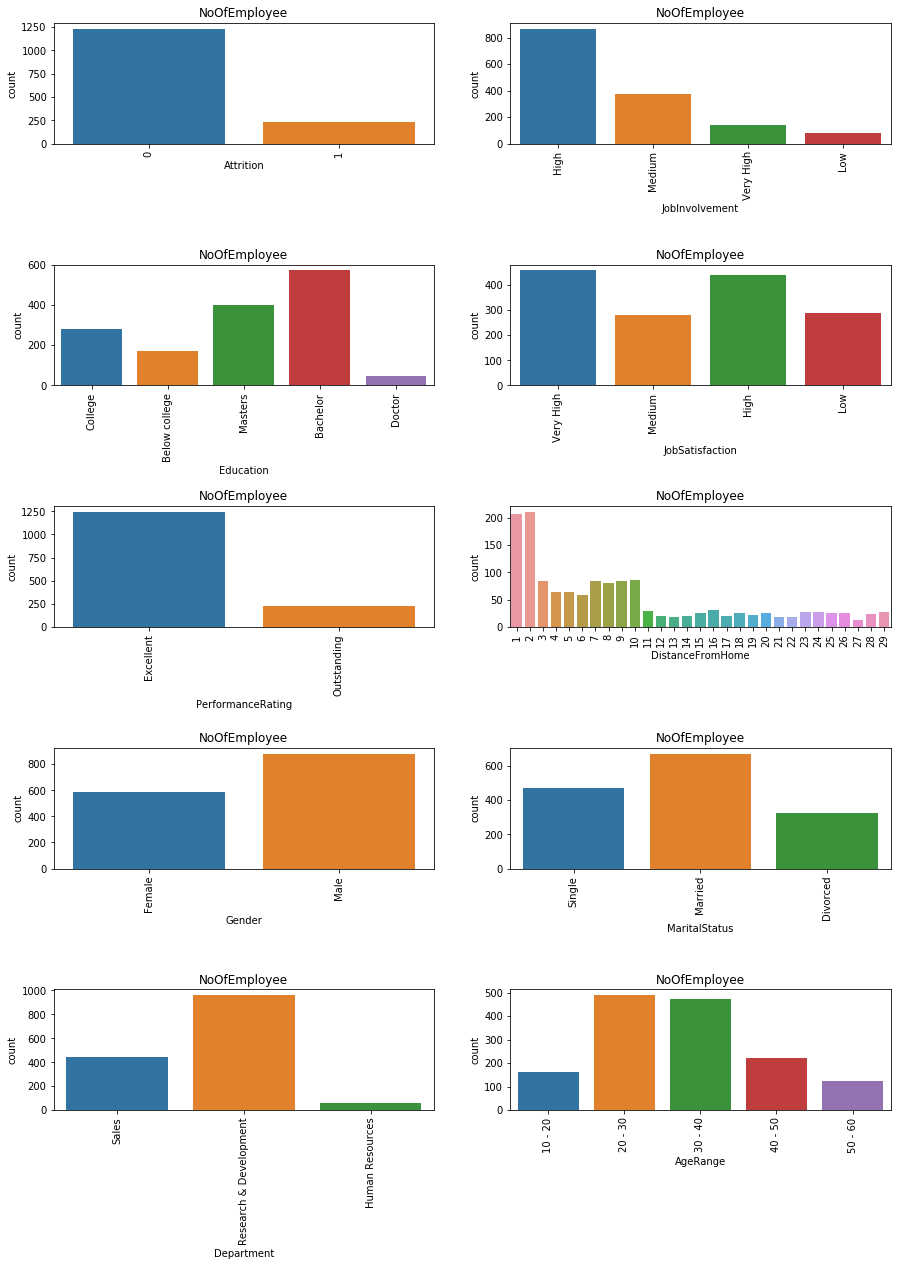

In [74]:
features=['Attrition','JobInvolvement','Education','JobSatisfaction', 'PerformanceRating','DistanceFromHome', 'Gender','MaritalStatus','Department', 'AgeRange']
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = new_df)
    plt.xticks(rotation=90)
    plt.title('NoOfEmployee')
    plt.savefig('AboutEmployee_AtIBM_bar_chart')

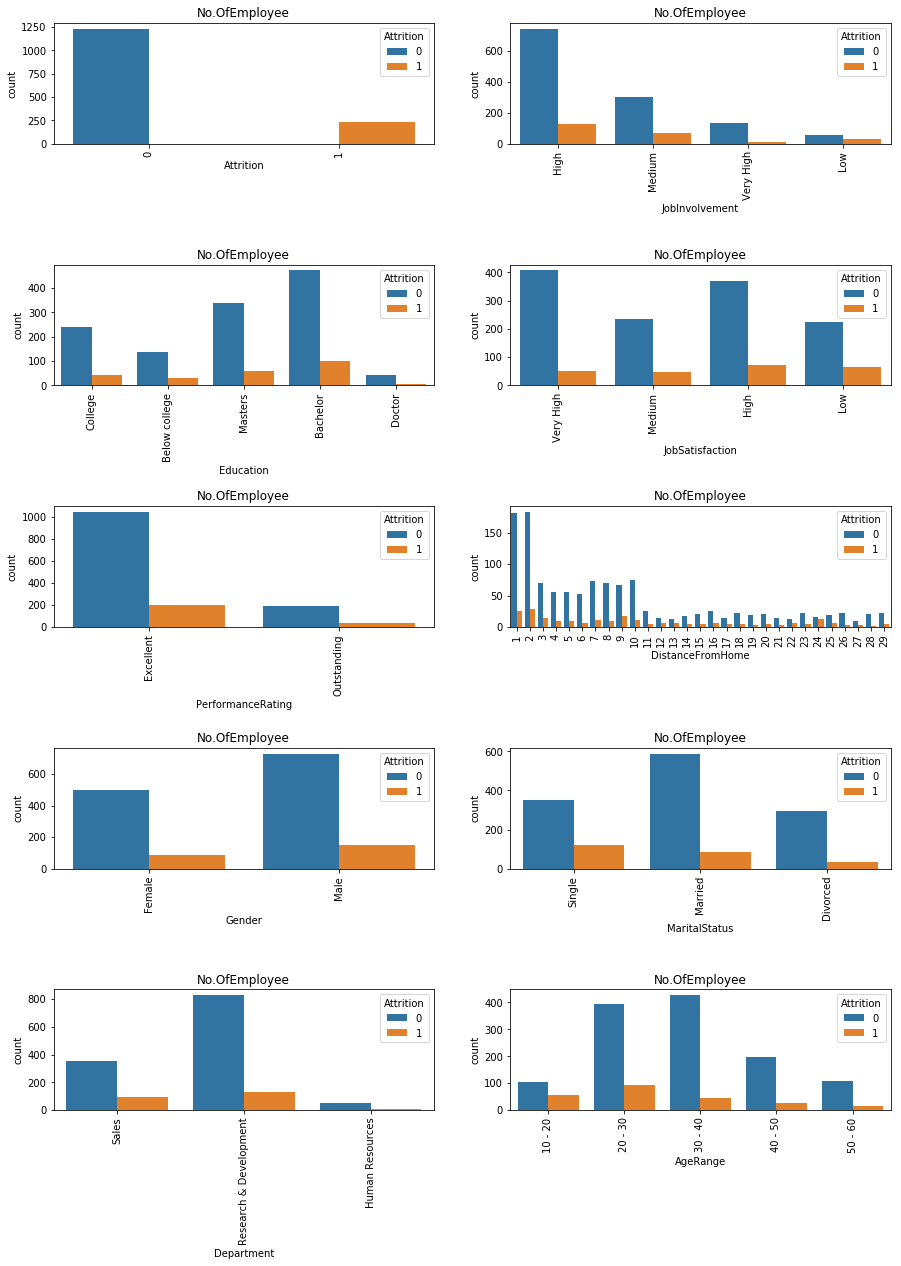

In [75]:
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features):
    plt.subplot(5, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = new_df, hue='Attrition')
    plt.xticks(rotation=90)
    plt.title('No.OfEmployee')
    plt.savefig('Factors_of_Attrition_bar_chart')

Data Analysis and Visualization Summary:
Following features are most influencing a person to leave the company:

Promotions: Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.
Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.
Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.
Salary: Most of the employees that quit among the mid or low salary groups.

Text(0.5, 1.05, 'This table shows the level of attrition based on Gender and Age Range')

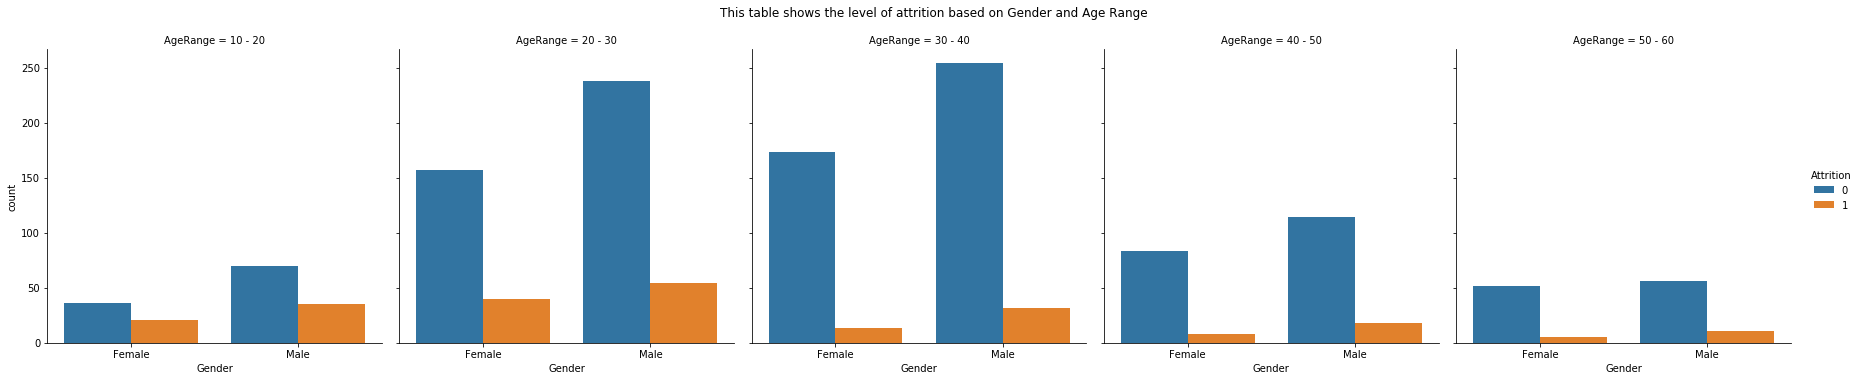

In [76]:
#This table shows the level of attrition based on Gender and Age Range
hg=sns.catplot(x='Gender',col='AgeRange',data=new_df, ci = None, kind= 'count', hue='Attrition')
hg.fig.suptitle('This table shows the level of attrition based on Gender and Age Range', y= 1.05)

# Question: How does work performance rating  affect employee attrition, In what way does level of education enhance work performance rating (positively/negatively) and how does it affect employee attrition

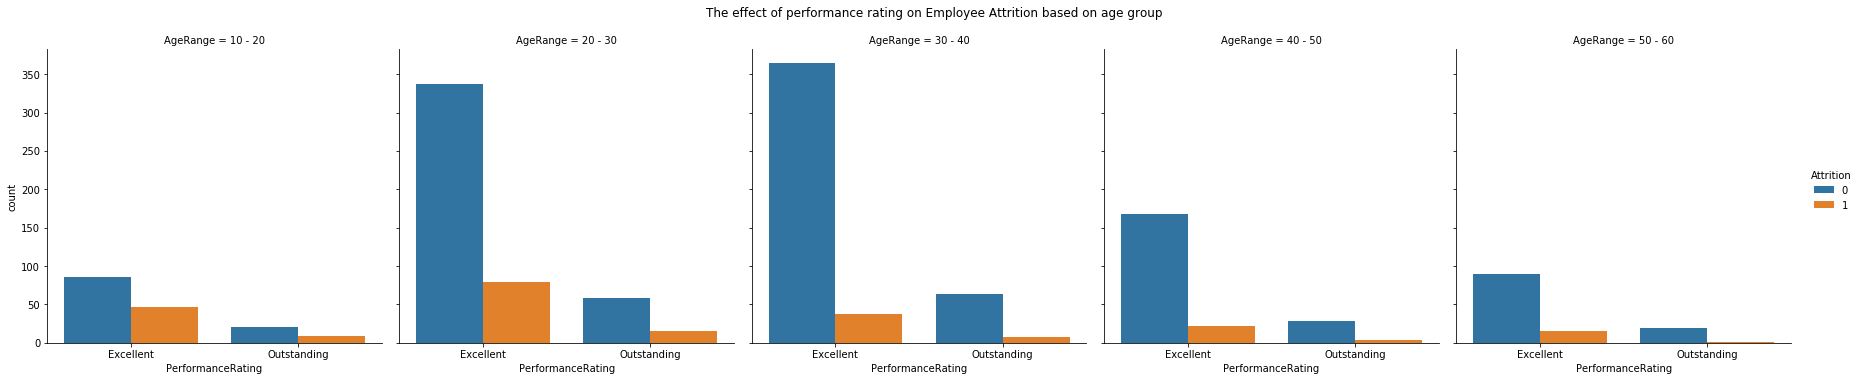

In [77]:
#this table shows how Performance Rating affect Attrition.
dg=sns.catplot(x='PerformanceRating',col='AgeRange', data= new_df, kind= 'count', hue='Attrition')
dg.fig.suptitle('The effect of performance rating on Employee Attrition based on age group', y=1.05)
plt.savefig('PerformanceandAttrrition_barchart')

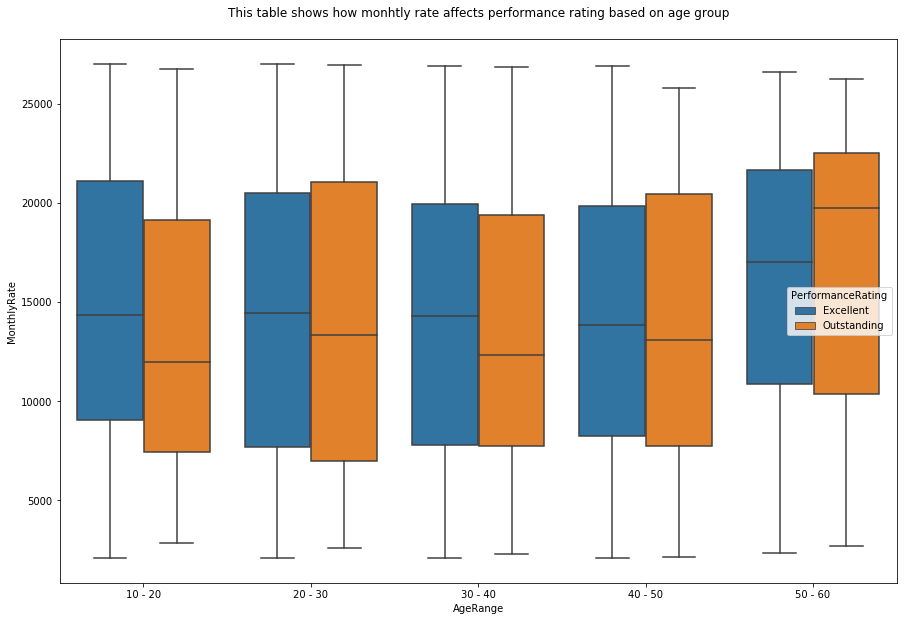

In [78]:
#this plot is supposed to depict how monthly rate affects Performance rating using Age Range
plt.figure(figsize=(15,10))
plt.title('This table shows how monhtly rate affects performance rating based on age group', y = 1.03)
fig=sns.boxplot(x='AgeRange',y='MonthlyRate', data= new_df, hue='PerformanceRating')
plt.savefig('MonthlyRateEffectonPerformance_boxchart')